In [1]:
from logicqubit.logic import *

logicqubit-gpu version 1.5.3


In [2]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [5]:
# f(x) = 7^x mod 15
# truth table
# x   - y
# 000 - 0001
# 001 - 0111
# 010 - 0100
# 011 - 1101
# 100 - 0001
# 101 - 0111
# 110 - 0100
# 111 - 1011

logicQuBit  = LogicQuBit(7, first_left=True)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()

y1 = Qubit()
y2 = Qubit()
y3 = Qubit()
y4 = Qubit()

x1.H()
x2.H()
x3.H()

oracle = Oracle([x1, x2, x3])
oracle.addTable(y1, ['011', '111'])
oracle.addTable(y2, ['001', '010', '011', '101','110'])
oracle.addTable(y3, ['001', '101', '111'])
oracle.addTable(y4, ['000', '001', '011', '100','101','111'])

logicQuBit.addOracle(oracle)
logicQuBit.PrintOperations()

qft([x1,x2,x3])
swap(x1,x3)

['H(1)', 'H(2)', 'H(3)', 'CCX(2,3,4)', 'CCX(2,3,5)', 'CX(2,5)', 'CX(3,5)', 'CCX(2,3,6)', 'CX(3,6)', 'CCX(2,3,7)', 'CX(2,7)', 'X(7)']


In [6]:
psi = x1.getPsiAtAngles(degree = True)
psi = {bin(i)[2:].zfill(7):value for i,value in enumerate(psi)}

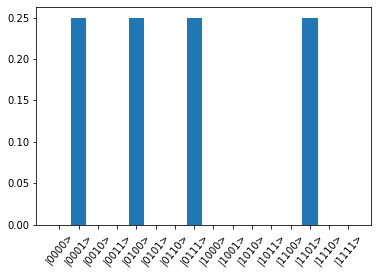

[0.0, 0.24999999999999978, 0.0, 0.0, 0.24999999999999978, 0.0, 0.0, 0.24999999999999978, 0.0, 0.0, 0.0, 0.0, 0.0, 0.24999999999999978, 0.0, 0.0]


In [7]:
res = logicQuBit.Measure([y1,y2,y3,y4], True)
#res = logicQuBit.Measure([x1,x2,x3], True)
logicQuBit.Plot()
print(res)